# Operations on Unit Circle

In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import pi
from random import randrange
from matplotlib.pyplot import arrow

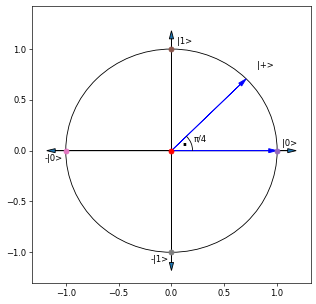

In [2]:
%run quantum.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(1,0,"")

draw_quantum_state(1/sqrttwo,1/sqrttwo,"|+>")

# drawing the angle with |0>-axis
from matplotlib.pyplot import gca, text
from matplotlib.patches import Arc
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=0,theta2=45) )
text(0.08,0.05,'.',fontsize=30)
text(0.21,0.09,'\u03C0/4')
show_plt()

Drawing the quantum states $ \ket{1} $ and $ \ket{-} = \stateminus $.

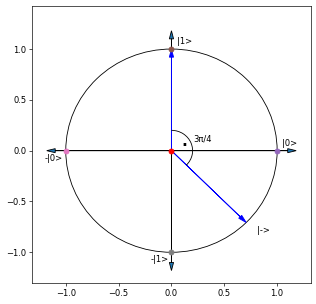

In [3]:
%run quantum.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(0,1,"")

draw_quantum_state(1/sqrttwo,-1/sqrttwo,"|->")

# drawing the angle with |0>-axis
from matplotlib.pyplot import gca, text
from matplotlib.patches import Arc
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=-45,theta2=90) )
text(0.08,0.05,'.',fontsize=30)
text(0.21,0.09,'3\u03C0/4')
show_plt()

## Rotations with ry-gate

In Qiskit, the ry-gate can be used for the rotations on the unit circle.

The default direction of a rotation by ry-gate is counterclockwise. It is used as follows:

    quantum_circuit.ry(2 * angle_of_rotation,qubit)

<i>Technical remark: ry-gate is defined on <a href="https://en.wikipedia.org/wiki/Bloch_sphere" target="_blank">Bloch sphere</a>. The states $ \ket{0} $ and $ \ket{1} $ are placed on the poles of Bloch sphere, and so the angle between them is $ \pi $ on Bloch sphere. On the other hand, the angles between the states $ \ket{0} $ and $ \ket{1} $ on the unit circle is $ \frac{\pi}{2} $. Therefore, when using ry-gate, we provide twice of $ \theta $ for a rotation with angle $\theta$ on the unit circle.</i>

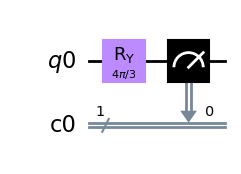

In [4]:
# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# angle of rotation in radian
rotation_angle = 2*pi/3

# rotate the qubit with rotation_angle
qc.ry(2*rotation_angle,q[0]) 

# measure the qubit
qc.measure(q,c)

# draw the circuit
qc.draw(output='mpl')

{'0': 2506, '1': 7494}


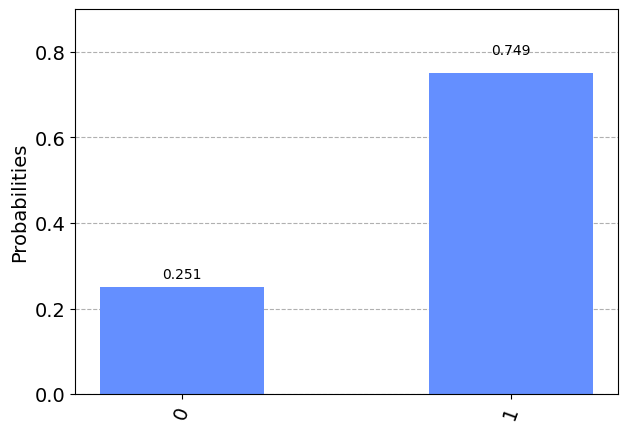

In [5]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=10000)

# print the results
counts = job.result().get_counts(qc)
print(counts)

# draw the histogram
plot_histogram(counts)

In [6]:
from math import sin,cos

# the quantum state
quantum_state = [ cos(rotation_angle) , sin (rotation_angle) ]
print("The quantum state is",round(quantum_state[0],4),"|0> +",round(quantum_state[1],4),"|1>")

the_expected_number_of_zeros = 1000*cos(rotation_angle)**2
the_expected_number_of_ones = 1000*sin(rotation_angle)**2

# expected results
print("The expected value of observing '0' is",round(the_expected_number_of_zeros,4))
print("The expected value of observing '1' is",round(the_expected_number_of_ones,4))

The quantum state is -0.5 |0> + 0.866 |1>
The expected value of observing '0' is 250.0
The expected value of observing '1' is 750.0


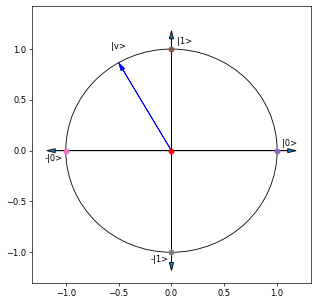

In [7]:
%run quantum.py

draw_qubit()

draw_quantum_state(quantum_state[0],quantum_state[1],"|v>")

<h3> Task 1 </h3>

Start with state $ \ket{0} $. 

Apply $ R(\pi/4) $ 7 times, and draw each state on the unit circle.

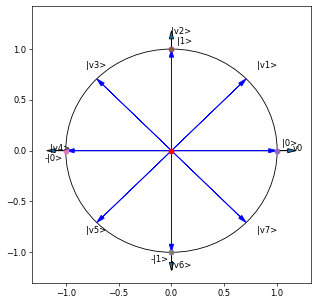

In [8]:
%run quantum.py

draw_qubit()

[x,y]=[1,0]

draw_quantum_state(x,y,"v0")

sqrttwo = 2**0.5
oversqrttwo = 1/sqrttwo

R = [ [oversqrttwo, -1*oversqrttwo], [oversqrttwo,oversqrttwo] ]

# function for rotation R
def rotate(px,py):
    newx = R[0][0]*px + R[0][1]*py
    newy = R[1][0]*px + R[1][1]*py
    return [newx,newy]

# apply rotation R 7 times
for i in range(1,8):
    [x,y] = rotate(x,y)
    draw_quantum_state(x,y,"|v"+str(i)+">")

show_plt()

<h3> Task 2 </h3>

We implement Task 1 by using "ry-gate" and "statevector_simulator".

Define a quantum circuit with one qubit. 

Iterate seven times
- Apply the rotation with angle $ \pi \over 4 $ by using ry-gate
- Read the current quantum state
- Print the current quantum state
- Draw the quantum state on the unit circle by using the values of the current quantum state

iteration 1 : the quantum state is ( 0.707 ) |0> +( 0.707 ) |1>
iteration 2 : the quantum state is ( 0.0 ) |0> +( 1.0 ) |1>
iteration 3 : the quantum state is ( -0.707 ) |0> +( 0.707 ) |1>
iteration 4 : the quantum state is ( -1.0 ) |0> +( 0.0 ) |1>
iteration 5 : the quantum state is ( -0.707 ) |0> +( -0.707 ) |1>
iteration 6 : the quantum state is ( 0.0 ) |0> +( -1.0 ) |1>
iteration 7 : the quantum state is ( 0.707 ) |0> +( -0.707 ) |1>


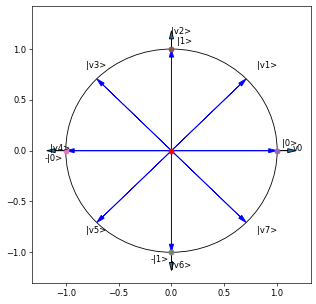

In [9]:
%run quantum.py

draw_qubit()

[x,y]=[1,0]

draw_quantum_state(x,y,"v0")

q =  QuantumRegister(1)
c = ClassicalRegister(1) 
qc = QuantumCircuit(q,c)

rotation_angle = pi/4

for i in range(1,8):
    qc.ry(2*rotation_angle,q[0]) 
    
    job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state=job.result().get_statevector(qc,3).data
    
    x_value = current_quantum_state[0].real # get the amplitude of |0>
    y_value = current_quantum_state[1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",x_value,") |0>","+(",y_value,") |1>")
    
    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")

show_plt()

<h3> Task 3 </h3>

Repeat Task 2 for the angle $ \pi/6 $ by applying the rotation 12 times. 

Repeat Task 2 for the angle $ 3\pi/8 $ by applying the rotation 16 times. 

Repeat Task 2 for the angle $ \sqrt{2}\pi $ by applying the rotation 20 times. 

iteration 1 : the quantum state is ( 0.866 ) |0> +( 0.5 ) |1>
iteration 2 : the quantum state is ( 0.5 ) |0> +( 0.866 ) |1>
iteration 3 : the quantum state is ( 0.0 ) |0> +( 1.0 ) |1>
iteration 4 : the quantum state is ( -0.5 ) |0> +( 0.866 ) |1>
iteration 5 : the quantum state is ( -0.866 ) |0> +( 0.5 ) |1>
iteration 6 : the quantum state is ( -1.0 ) |0> +( 0.0 ) |1>
iteration 7 : the quantum state is ( -0.866 ) |0> +( -0.5 ) |1>
iteration 8 : the quantum state is ( -0.5 ) |0> +( -0.866 ) |1>
iteration 9 : the quantum state is ( -0.0 ) |0> +( -1.0 ) |1>
iteration 10 : the quantum state is ( 0.5 ) |0> +( -0.866 ) |1>
iteration 11 : the quantum state is ( 0.866 ) |0> +( -0.5 ) |1>
iteration 12 : the quantum state is ( 1.0 ) |0> +( -0.0 ) |1>


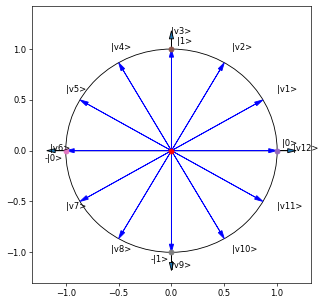

In [14]:
%run quantum.py

draw_qubit()

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

q =  QuantumRegister(1) 
c = ClassicalRegister(1) 
qc = QuantumCircuit(q,c)

rotation_angle = pi/6

for i in range(1,13):

    qc.ry(2*rotation_angle,q[0]) 
    
    job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state=job.result().get_statevector(qc,3).data
    
    x_value = current_quantum_state[0].real # get the amplitude of |0>
    y_value = current_quantum_state[1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",x_value,") |0>","+(",y_value,") |1>")

    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")

show_plt()

## Reflections

### Z-gate operator

<h3> Task 4</h3>

Create a quantum ciruit with 5 qubits.

Apply h-gate (Hadamard operator) to each qubit.

Apply z-gate ($Z$ operator) to randomly picked qubits. (i.e., $ mycircuit.z(qreg[i]) $)

Apply h-gate to each qubit.

Measure each qubit.

Execute your program 1000 times.

Compare the outcomes of the qubits affected by z-gates, and the outcomes of the qubits not affected by z-gates.

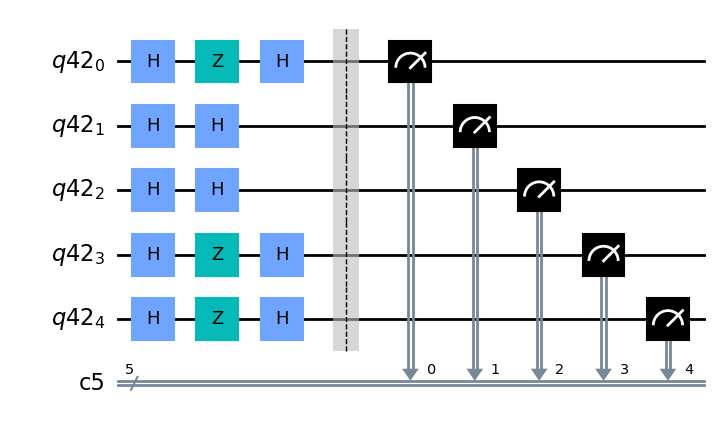

In [15]:
number_of_qubit = 5

q =  QuantumRegister(number_of_qubit)
c = ClassicalRegister(number_of_qubit)

qc = QuantumCircuit(q,c)

for i in range(number_of_qubit):
    qc.h(q[i])

for i in range(number_of_qubit):
    if randrange(2) == 0: # the qubit with index i is picked to apply z-gate
        qc.z(q[i])
        
for i in range(number_of_qubit):
    qc.h(q[i])
    
qc.barrier()
    
# measure all qubits
qc.measure(q,c)

# draw the circuit
display(qc.draw(output='mpl'))

In [16]:
# execute the circuit 1000 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)

{'11001': 1000}


<h3> Task 5 </h3>

Randomly create a quantum state and multiply it with Hadamard matrix to find its reflection.

Draw both states.

Repeat the task for a few times.

A function for randomly creating a 2-dimensional quantum state:

In [18]:
from math import cos, sin, pi
from random import randrange
def random_qstate_by_angle():
    angle_degree = randrange(360)
    angle_radian = 2*pi*angle_degree/360
    return [cos(angle_radian),sin(angle_radian)]

-0.4210358133674908 -0.9070440142914651
-0.939094252094709 0.3436596945856163


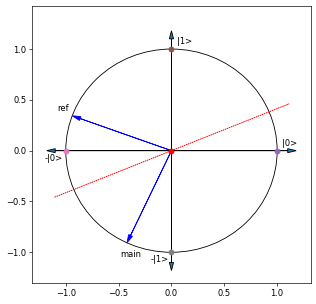

In [19]:
%run quantum.py

draw_qubit()

arrow(-1.109,-0.459,2.218,0.918,linestyle='dotted',color='red')

[x1,y1] = random_qstate_by_angle()

print(x1,y1)

sqrttwo=2**0.5
oversqrttwo = 1/sqrttwo

[x2,y2] = [ oversqrttwo*x1 + oversqrttwo*y1 , oversqrttwo*x1 - oversqrttwo*y1 ]

print(x2,y2)

draw_quantum_state(x1,y1,"main")

draw_quantum_state(x2,y2,"ref")

show_plt()

<h3> Task 6 </h3>

Find the matrix representing the reflection over the line $y=x$.

<i>Hint: Think about the reflections of the points $ \myrvector{0 \\ 1} $, $ \myrvector{-1 \\ 0} $, and $ \myrvector{-\sqrttwo \\ \sqrttwo} $ over the line $y=x$.</i>

Randomly create a quantum state and multiply it with this matrix to find its reflection over the line $y = x$.

Draw both states.

Repeat the task for a few times.

The reflection over the line $y=x$ swaps the first and second amplitudes.

This is the operetor NOT: $ X = \mymatrix{rr}{0 & 1 \\ 1 & 0} $.

A function for randomly creating a 2-dimensional quantum state:

In [20]:
# randomly create a 2-dimensional quantum state
def random_qstate_by_angle():
    angle_degree = randrange(360)
    angle_radian = 2*pi*angle_degree/360
    return [cos(angle_radian),sin(angle_radian)]

Reflecting the randomly picked quantum state over the line $y=x$. 

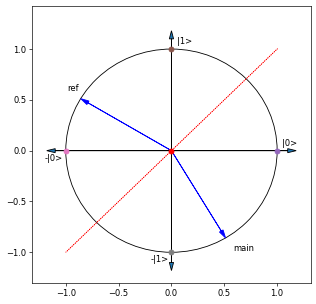

In [21]:
%run quantum.py

draw_qubit()

# the line y=x
from matplotlib.pyplot import arrow
arrow(-1,-1,2,2,linestyle='dotted',color='red')

[x1,y1] = random_qstate_by_angle()

[x2,y2] = [y1,x1]

draw_quantum_state(x1,y1,"main")
draw_quantum_state(x2,y2,"ref")

show_plt()

# Simplified Quantum Tomography

We study a simplified version of quantum tomography here. 

It is similar to learn the bias of a coin by collecting statistics from tossing this coin many times. But, only making measurement may not be enough to make a good guess.

Suppose that you are given 1000 copies of a qubit and your task is to learn the state of this qubit. We use a python class called "unknown_qubit" for doing our quantum experiments. 

Please run the following cell before continuing.

In [22]:
# class unknown_qubit
#   available_qubit = 1000 -> you get at most 1000 qubit copies
#   get_qubits(number_of_qubits) -> you get the specified number of qubits for your experiment
#   measure_qubits() -> your qubits are measured and the result is returned as a dictionary variable
#                    -> after measurement, these qubits are destroyed
#   rotate_qubits(angle) -> your qubits are rotated with the specified angle in radian
#   compare_my_guess(my_angle) -> your guess in radian is compared with the real angle

from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
class unknown_qubit:   
    def __init__(self):
        self.__theta = randrange(18000)/18000*pi        
        self.__available_qubits = 1000
        self.__active_qubits = 0
        print(self.__available_qubits,"qubits are created")
    
    def get_qubits(self,number_of_qubits=None):
        if number_of_qubits is None or isinstance(number_of_qubits,int) is False or number_of_qubits < 1:
            print()
            print("ERROR: the method 'get_qubits' takes the number of qubit(s) as a positive integer, i.e., get_qubits(100)")
        elif number_of_qubits <= self.__available_qubits:
            self.__qc = QuantumCircuit(1,1)
            self.__qc.ry(2 * self.__theta,0)
            self.__active_qubits = number_of_qubits
            self.__available_qubits = self.__available_qubits - self.__active_qubits
            print()
            print("You have",number_of_qubits,"active qubits that are set to (cos(theta),sin(theta))")
            self.available_qubits()
        else:
            print()
            print("WARNING: you requested",number_of_qubits,"qubits, but there is not enough available qubits!")
            self.available_qubits()
            
    def measure_qubits(self):    
        if self.__active_qubits > 0:            
            self.__qc.measure(0,0)
            job = execute(self.__qc,Aer.get_backend('qasm_simulator'),shots=self.__active_qubits)
            counts = job.result().get_counts(self.__qc)
            print()
            print("your",self.__active_qubits,"qubits are measured")
            print("counts = ",counts)
            self.__active_qubits = 0
            return counts
        else:
            print()
            print("WARNING: there is no active qubits -- you might first execute 'get_qubits()' method")
            self.available_qubits()
            
    def rotate_qubits(self,angle=None):
        if angle is None or (isinstance(angle,float) is False and isinstance(angle,int) is False):
            print()
            print("ERROR: the method 'rotate_qubits' takes a real-valued angle in radian as its parameter, i.e., rotate_qubits(1.2121)")
        elif self.__active_qubits > 0:
            self.__qc.ry(2 * angle,0)
            print()
            print("your active qubits are rotated by angle",angle,"in radian")
        else:
            print()
            print("WARNING: there is no active qubits -- you might first execute 'get_qubits()' method")
            self.available_qubits()    
    
    def compare_my_guess(self,my_angle):
        if my_angle is None or (isinstance(my_angle,float) is False and isinstance(my_angle,int) is False):
            print("ERROR: the method 'compare_my_guess' takes a real-valued angle in radian as your guessed angle, i.e., compare_my_guess(1.2121)")
        else:
            self.__available_qubits = 0
            diff = abs(my_angle-self.__theta)
            print()
            print(self.__theta,"is the original",)
            print(my_angle,"is your guess")
            print("the angle difference between the original theta and your guess is",diff/pi*180,"degree")
            print("-->the number of available qubits is (set to) zero, and so you cannot make any further experiment")

    def available_qubits(self):
        print("--> the number of available unused qubit(s) is",self.__available_qubits)              

class unknown_qubit:
    
    available_qubit = 1000 -> you get at most 1000 qubit copies
    get_qubits(number_of_qubits) -> you get the specified number of qubits for your experiment
    measure_qubits() -> your qubits are measured and the result is returned as a dictionary variable
                     -> after measurement, these qubits are destroyed
    rotate_qubits(angle) -> your qubits are rotated with the specified angle in radian
    compare_my_guess(my_angle) -> your guess in radian is compared with the real angle